In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = False

In [ ]:
R = 10
d1 = 6
r = 2

t = np.linspace(0, 5, 100)
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
for la in range(4, 10, 1):
    err = R * np.exp(-la * t)  + d1/la*(1 - np.exp(-la * t))

    ax.plot(t, err, label='lambda = %d' % la)


ax.plot(t, np.ones(len(t)) * r, label='$r(theta)$', linestyle='--')

ax.scatter(2, 0, color='black', marker='X', label='$t(theta)$')

ax.set_xlabel('time $t$')
ax.set_ylabel('upper bound of $||e||$')
ax.set_title('As lambda increases, the upper bound of $||e||$ decreases')
ax.legend(loc='upper right')
ax.legend()
ax.grid()
ax.set_xlim([0, 4])
ax.set_ylim([0, 10])

# Example: draw a red arrow from (t=1.5, e=3) down to (t=0.2, e=0.5)
ax.annotate(
    "As $\\lambda$ increases,\nthe upper bound of $||e||$ \nwill decay towards 0",
    xy=(1, 4),            # arrow tip (near the origin)
    xytext=(1.5, 8),        # starting point of the arrow
    fontsize=10,
    arrowprops=dict(
        arrowstyle="->",
        color="red",
        lw=2
    ),
    color="red"
)


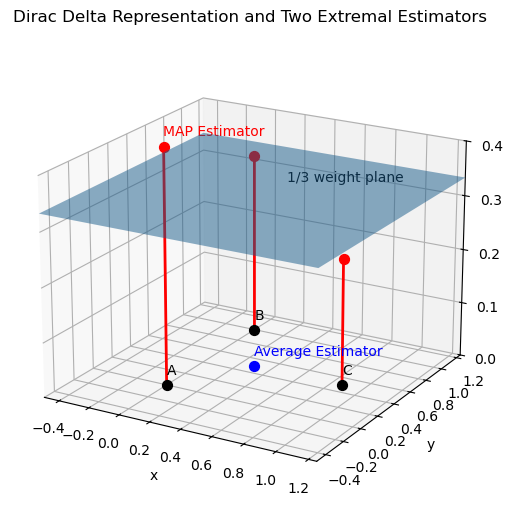

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import art3d

eps = 0.1
# Define your points (x, y, weight = 1/3)
x1 = np.array([0, 0, 1/3 + eps])
x2 = np.array([0, 1, 1/3])
x3 = np.array([np.sqrt(3)/2, 1/2, 1/3 - eps])
# Compute the average estimator and set its weight (z-coordinate) to 0
x4 = (x1 + x2 + x3) / 3
x4[2] = 0

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each "Dirac delta" as a vertical spike with its tip marked
for (x, y, w) in [x1, x2, x3]:
    # Draw a vertical line from z=0 up to z=w
    ax.plot([x, x], [y, y], [0, w], color='red', lw=2)
    # Mark the tip of the spike
    ax.scatter(x, y, w, color='red', s=50)

# Plot the base points (on the x-y plane)
ax.scatter(x1[0], x1[1], 0, color='black', s=50)
ax.scatter(x2[0], x2[1], 0, color='black', s=50)
ax.scatter(x3[0], x3[1], 0, color='black', s=50)
# Plot the average estimator point
ax.scatter(x4[0], x4[1], x4[2], color='blue', s=50)

# Plot the 1/3 weight plane
x_plane = np.linspace(-0.5, 1.25, 2)
y_plane = np.linspace(-0.5, 1.25, 2)
xx, yy = np.meshgrid(x_plane, y_plane)
zz = np.full(xx.shape, 1/3)
ax.plot_surface(xx, yy, zz, alpha=0.5)

# Label axes with extra padding for the z label
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Weight', labelpad=15)

# Add text annotations for the estimators and points
ax.text(x1[0], x1[1], x1[2] + 0.02, "MAP Estimator", color='red')
ax.text(x4[0], x4[1], x4[2] + 0.02, "Average Estimator", color='blue')
ax.text(x1[0], x1[1], 0.02, "A", color='black')
ax.text(x2[0], x2[1], 0.02, "B", color='black')
ax.text(x3[0], x3[1], 0.02, "C", color='black')
ax.text(0.5, 0.5, 1/3 + 0.02, "1/3 weight plane", color='black')

ax.set_title('Dirac Delta Representation and Two Extremal Estimators', pad=10)

# Adjust the viewing angle to make the plot appear flatter.
ax.view_init(elev=20, azim=-60)

# Set tighter axis limits for a zoomed-in view.
ax.set_xlim([-0.5, 1.25])
ax.set_ylim([-0.5, 1.25])
ax.set_zlim([0, 0.4])
ax.set_zticks([0, 0.1, 0.2, 0.3, 0.4])

# Manually adjust the subplot to leave more space for axis labels
plt.subplots_adjust(left=0.12, right=0.95, top=0.9, bottom=0.1)

plt.show()


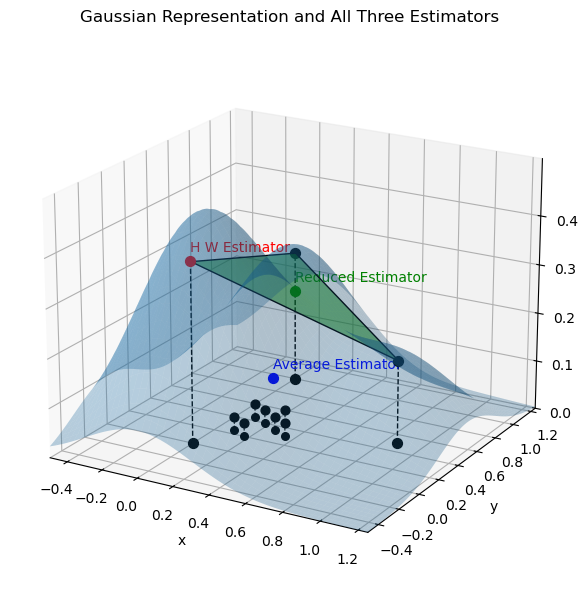

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Use mathtext (without external LaTeX) for titles
plt.rcParams['text.usetex'] = False

# User parameters
eps = 0.1
sigma = 0.3  # User-selected sigma

# === Major Points ===
# Three major Dirac delta points: weights 0.27+eps, 0.27, 0.27-eps (total = 0.81)
A = np.array([0, 0])
B = np.array([0, 1])
C = np.array([np.sqrt(3)/2, 0.5])
wA = 0.27 + eps
wB = 0.27
wC = 0.27 - eps
x1 = np.append(A, wA)
x2 = np.append(B, wB)
x3 = np.append(C, wC)

# === Minor Points ===
# Define 7 minor points (total weight 0.19; each gets 0.19/7)
w_minor = 0.19 / 7
bary_coords = np.array([
    [0.2, 0.1],
    [0.1, 0.2],
    [0.3, 0.3],
    [0.4, 0.1],
    [0.1, 0.4],
    [0.2, 0.3],
    [0.3, 0.2]
])
minor_points = []


for alpha, beta in bary_coords:
    pt_xy = A + alpha*(B - A) + beta*(C - A)
    pt = np.append(pt_xy, w_minor)
    minor_points.append(pt)
minor_points = np.array(minor_points)

# average estimator averge over all points, major and minor
x4 = (x1 + x2 + x3 + np.sum(minor_points, axis=0)) / (3 + len(minor_points))

# effective estimator only major points
x5 = (x1 + x2 + x3) / 3

# === Setup Figure and Axis ===
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# draw a green flat surface for the major points
tri = [(x1[0], x1[1], x1[2]), (x2[0], x2[1], x2[2]), (x3[0], x3[1], x3[2])]
ax.add_collection3d(Poly3DCollection([tri], facecolors='green', alpha=0.5, linewidths=1, edgecolors='k'))

# Create a meshgrid for the Gaussian surface.
x_vals = np.linspace(-0.5, 1.25, 200)
y_vals = np.linspace(-0.5, 1.25, 200)
xx, yy = np.meshgrid(x_vals, y_vals)

# === Compute Gaussian Surface ===
# Gaussian contributions from major points.
z1 = x1[2] * np.exp(-(((xx - x1[0])**2 + (yy - x1[1])**2) / (2 * sigma**2)))
z2 = x2[2] * np.exp(-(((xx - x2[0])**2 + (yy - x2[1])**2) / (2 * sigma**2)))
z3 = x3[2] * np.exp(-(((xx - x3[0])**2 + (yy - x3[1])**2) / (2 * sigma**2)))

# Gaussian contributions from minor points.
z_minor_total = np.zeros_like(xx)
for pt in minor_points:
    z_minor_total += pt[2] * np.exp(-(((xx - pt[0])**2 + (yy - pt[1])**2) / (2 * sigma**2)))

# Total Gaussian surface.
zz = z1 + z2 + z3 + z_minor_total

# find the maximum value of zz and the corresponding x and y coordinates
max_val = np.max(zz)
max_idx = np.unravel_index(np.argmax(zz), zz.shape)
max_x = xx[max_idx]
max_y = yy[max_idx]

# Plot the Gaussian surface.
surf = ax.plot_surface(xx, yy, zz, alpha=0.3, edgecolor='none')

ax.scatter(x1[0], x1[1], x1[2], color='red', s=50, label='Highest Weight Estimator')
ax.scatter(x2[0], x2[1], x2[2], color='black', s=50)
ax.scatter(x3[0], x3[1], x3[2], color='black', s=50)
ax.scatter(x4[0], x4[1], x4[2], color='blue', s=50, label='Average Estimator')
ax.scatter(x5[0], x5[1], x5[2], color='green', s=50, label='Effective Estimator')

for pt in [x1, x2, x3]:
    ax.scatter(pt[0], pt[1], 0, color='black', s=50)
    ax.plot([pt[0], pt[0]], [pt[1], pt[1]], [0, pt[2]], color='k', linestyle='--', lw=1)

for pt in minor_points:
    ax.scatter(pt[0], pt[1], pt[2], color='black', s=40)
    ax.scatter(pt[0], pt[1], 0, color='black', s=30)
    ax.plot([pt[0], pt[0]], [pt[1], pt[1]], [0, pt[2]], color='k', linestyle='--', lw=0.8)    

# === Add Lines Connecting Dirac Delta Weight to Gaussian Weight ===
# Define a function to evaluate the Gaussian surface at a given (x, y).
def gaussian_value_at(x, y):
    val = (x1[2] * np.exp(-(((x - x1[0])**2 + (y - x1[1])**2) / (2 * sigma**2))) +
           x2[2] * np.exp(-(((x - x2[0])**2 + (y - x2[1])**2) / (2 * sigma**2))) +
           x3[2] * np.exp(-(((x - x3[0])**2 + (y - x3[1])**2) / (2 * sigma**2))))
    for pt in minor_points:
        val += pt[2] * np.exp(-(((x - pt[0])**2 + (y - pt[1])**2) / (2 * sigma**2)))
    return val

# === Labels and Title ===
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Weight', labelpad=15)
ax.set_title(r'Gaussian Representation and All Three Estimators', pad=10)
ax.text(x4[0], x4[1], x4[2] + 0.02, "Average Estimator", color='blue')
ax.text(x5[0], x5[1], x5[2] + 0.02, "Reduced Estimator", color='green')
ax.text(x1[0], x1[1], x1[2] + 0.02, "H W Estimator", color='red')

# === Viewing Angle and Axis Limits ===
ax.view_init(elev=20, azim=-60)
ax.set_xlim([-0.5, 1.25])
ax.set_ylim([-0.5, 1.25])
ax.set_zlim([0, np.max(zz) + 0.05])
ax.set_zticks([0, 0.1, 0.2, 0.3, 0.4])
plt.subplots_adjust(left=0.12, right=0.95, top=0.9, bottom=0.1)
plt.show()

# save to Figure output folder as png
#fig.savefig('output/gaussian_representation.png', dpi=300, bbox_inches='tight')

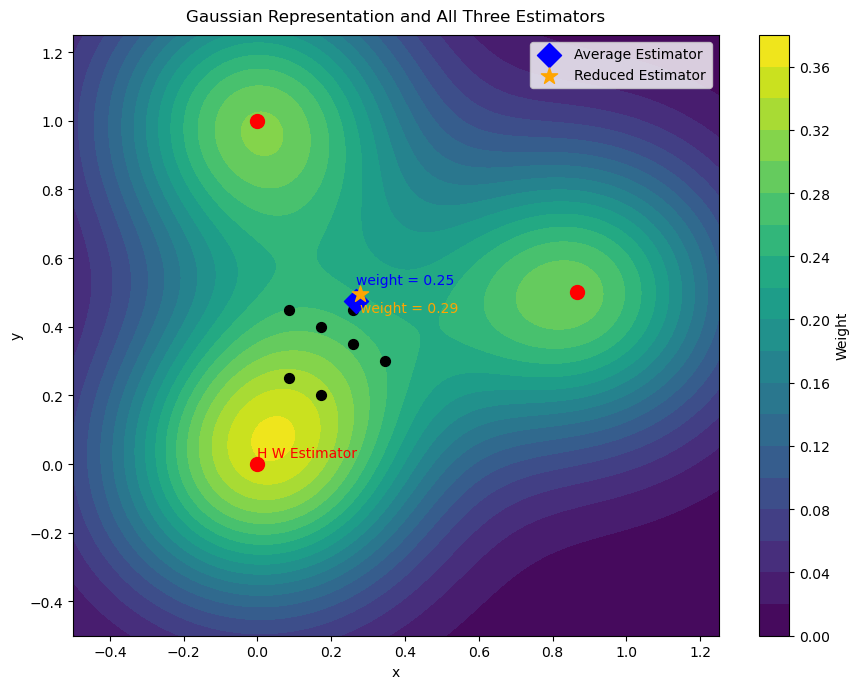

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Use mathtext (without external LaTeX) for titles
plt.rcParams['text.usetex'] = False

# User parameters
eps = 0.01
sigma = 0.3 # User-selected sigma
equal_weight = 0.29  # User-selected weight for minor points
# === Major Points ===
# Three major Dirac delta points: weights 0.27+eps, 0.27, 0.27-eps (total = 0.81)
A = np.array([0, 0])
B = np.array([0, 1])
C = np.array([np.sqrt(3)/2, 0.5])
wA = equal_weight + eps
wB = equal_weight
wC = equal_weight - eps
x1 = np.append(A, wA)
x2 = np.append(B, wB)
x3 = np.append(C, wC)

# === Minor Points ===
# Define 7 minor points (total weight 0.19; each gets 0.19/7)
w_minor = (1-3*equal_weight)/ 7
bary_coords = np.array([
    [0.2, 0.1],
    [0.1, 0.2],
    [0.3, 0.3],
    [0.4, 0.1],
    [0.1, 0.4],
    [0.2, 0.3],
    [0.3, 0.2]
])
minor_points = []
for alpha, beta in bary_coords:
    pt_xy = A + alpha * (B - A) + beta * (C - A)
    pt = np.append(pt_xy, w_minor)
    minor_points.append(pt)
minor_points = np.array(minor_points)

# Estimators:
# Weighted average over all points (major + minor)
x4 = (wA*x1 + wB*x2 + wC*x3 + w_minor*np.sum(minor_points, axis=0))
# Barycenter of major points only
x5 = wA*x1/(1-7*w_minor) + wB*x2/(1-7*w_minor) + wC*x3/(1-7*w_minor)

# === Setup Figure and Axis ===
fig, ax = plt.subplots(figsize=(9, 7))

# Create a meshgrid for the Gaussian surface.
x_vals = np.linspace(-0.5, 1.25, 200)
y_vals = np.linspace(-0.5, 1.25, 200)
xx, yy = np.meshgrid(x_vals, y_vals)

# === Compute Gaussian Surface ===
# Contributions from major points.
z1 = x1[2] * np.exp(-(((xx - x1[0])**2 + (yy - x1[1])**2) / (2 * sigma**2)))
z2 = x2[2] * np.exp(-(((xx - x2[0])**2 + (yy - x2[1])**2) / (2 * sigma**2)))
z3 = x3[2] * np.exp(-(((xx - x3[0])**2 + (yy - x3[1])**2) / (2 * sigma**2)))
# Contributions from minor points.
z_minor_total = np.zeros_like(xx)
for pt in minor_points:
    z_minor_total += pt[2] * np.exp(-(((xx - pt[0])**2 + (yy - pt[1])**2) / (2 * sigma**2)))
# Total Gaussian surface.
zz = z1 + z2 + z3 + z_minor_total

# === Plot the Filled Contour ===
contour_levels = 20  # Number of contour levels
contour_plot = ax.contourf(xx, yy, zz, levels=contour_levels)
cbar = fig.colorbar(contour_plot, ax=ax)
cbar.set_label('Weight')

# === Scatter Plots for the Points ===
# Major points (red)
major_x = [x1[0], x2[0], x3[0]]
major_y = [x1[1], x2[1], x3[1]]
ax.scatter(major_x, major_y, color='red', s=100)

# Minor points (blue)
ax.scatter(minor_points[:, 0], minor_points[:, 1], color='black', s=50)

# Plot the overall weighted average (all points) using a green diamond.
ax.scatter(x4[0], x4[1], color='blue', s=150, marker='D', label='Average Estimator')

# Plot the barycenter of major points using an orange star.
ax.scatter(x5[0], x5[1], color='orange', s=150, marker='*', label='Reduced Estimator')

ax.text(x1[0], x1[1] + 0.02, "H W Estimator", color='red')
# only 2 digits
ax.text(x4[0], x4[1] + 0.05, "weight = {:.2f}".format(x4[2]), color='blue')
ax.text(x5[0], x5[1] - 0.05, "weight = {:.2f}".format(x5[2]), color='orange')

# === Labels and Title ===
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gaussian Representation and All Three Estimators', pad=10)
ax.legend()
plt.tight_layout()
plt.show()

# Optionally, save the figure:
# fig.savefig('output/gaussian_contour_with_barycenter_connection.png', dpi=300, bbox_inches='tight')


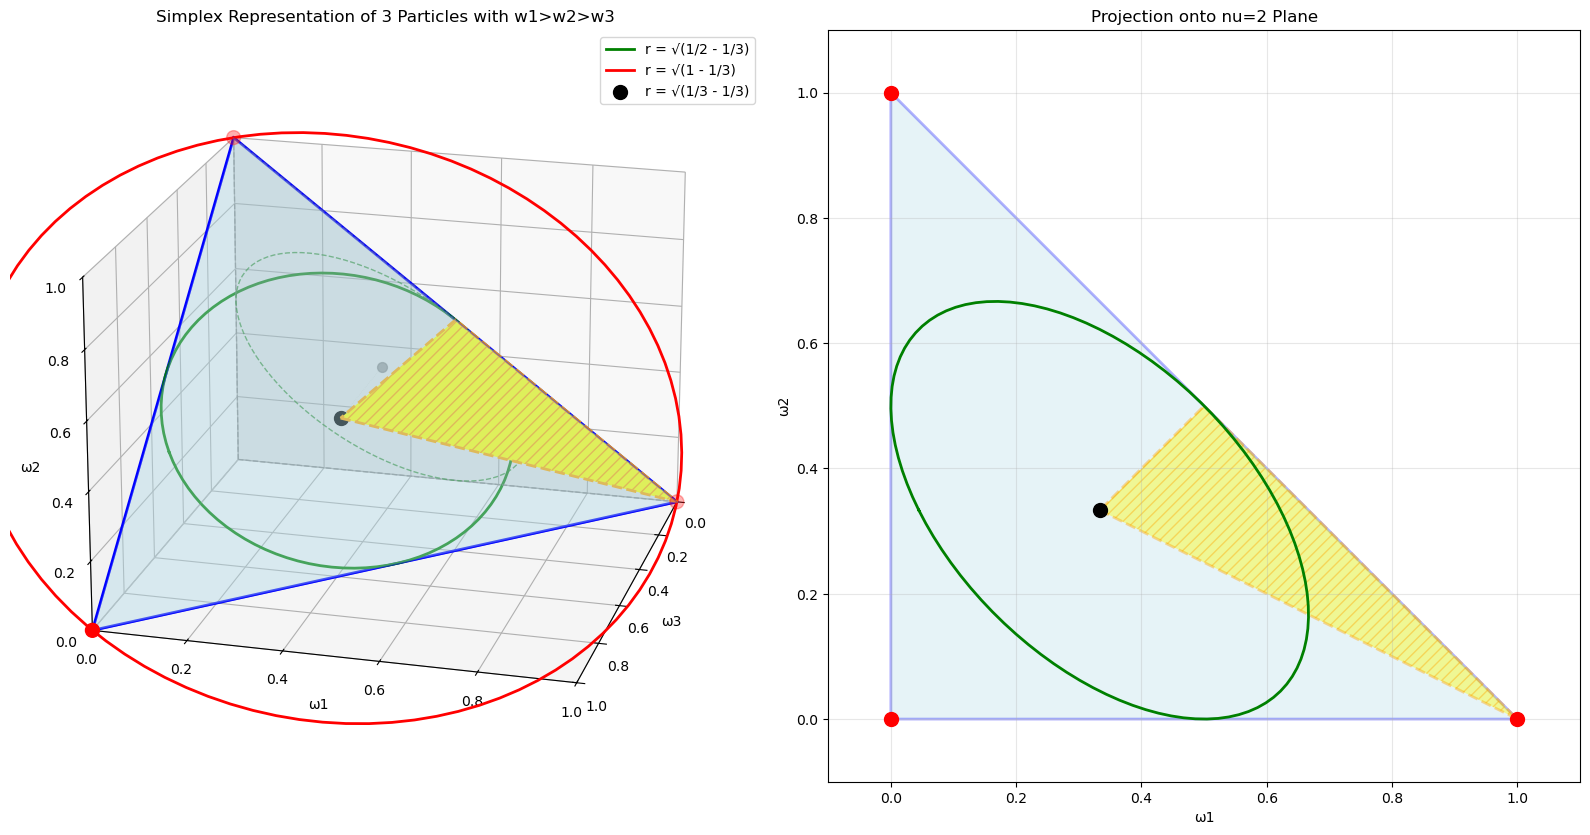

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Create figure with subplots
fig = plt.figure(figsize=(16, 8))

# ====== 3D PLOT (Left subplot) ======
ax1 = fig.add_subplot(421, projection='3d')

# Define the three vertices of the triangle
vertices = np.array([
    [1, 0, 0],  # Point on x-axis
    [0, 1, 0],  # Point on y-axis
    [0, 0, 1]   # Point on z-axis
])

# Create the triangular face
triangle = [vertices]
triangle_collection = Poly3DCollection(triangle, alpha=0.4, facecolor='blue', edgecolor='blue')
ax1.add_collection3d(triangle_collection)

# Plot the vertices
ax1.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], 
          color='red', s=100)

# Plot the edges
for i in range(3):
    start = vertices[i]
    end = vertices[(i + 1) % 3]
    ax1.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], 
            'b-', linewidth=2)

# Add circles centered at (1/3, 1/3, 1/3)
center = np.array([1/3, 1/3, 1/3])

# Define two orthogonal vectors in the simplex plane (x + y + z = 1)
u1 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])
u2 = np.array([1/np.sqrt(6), 1/np.sqrt(6), -2/np.sqrt(6)])

# Create parameter for circle
t = np.linspace(0, 2*np.pi, 100)

# First circle with radius 1/sqrt(6)
r1 = 1/np.sqrt(6)
circle1 = np.array([center + r1 * (np.cos(ti) * u1 + np.sin(ti) * u2) for ti in t])
ax1.plot(circle1[:, 0], circle1[:, 1], circle1[:, 2], 'g-', linewidth=2, label=f'r = √(1/2 - 1/3)')

# Second circle with radius 2/sqrt(6)
r2 = 2/np.sqrt(6)
circle2 = np.array([center + r2 * (np.cos(ti) * u1 + np.sin(ti) * u2) for ti in t])
ax1.plot(circle2[:, 0], circle2[:, 1], circle2[:, 2], 'r-', linewidth=2, label=f'r = √(1 - 1/3)')

# Plot the center point
ax1.scatter(center[0], center[1], center[2], color='black', s=100, label='r = √(1/3 - 1/3)')

# Project triangle shadow on ω3=0 plane (x=0)
shadow_vertices = np.array([
    [0, 0, 0],  # Projection of (1,0,0)
    [0, 1, 0],  # Projection of (0,1,0) 
    [0, 0, 1]   # Projection of (0,0,1)
])

# Draw shadow triangle edges
for i in range(3):
    start = shadow_vertices[i]
    end = shadow_vertices[(i + 1) % 3]
    ax1.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], 
            '--', color='gray', linewidth=1, alpha=0.7)

# Fill shadow triangle
shadow_triangle = [shadow_vertices]
shadow_collection = Poly3DCollection(shadow_triangle, alpha=0.2, facecolor='gray', edgecolor='none')
ax1.add_collection3d(shadow_collection)

# Project circle shadows on ω3=0 plane
circle1_shadow = np.column_stack([np.zeros(len(t)), circle1[:, 1], circle1[:, 2]])
ax1.plot(circle1_shadow[:, 0], circle1_shadow[:, 1], circle1_shadow[:, 2], 
         '--', color='green', linewidth=1, alpha=0.7)


# Project center shadow
center_shadow = [0, center[1], center[2]]
ax1.scatter(center_shadow[0], center_shadow[1], center_shadow[2], 
           color='gray', s=50, alpha=0.7)

# Draw projection lines from 3D elements to their shadows
# Lines from vertices to shadow vertices
for vertex, shadow in zip(vertices, shadow_vertices):
    ax1.plot([vertex[0], shadow[0]], [vertex[1], shadow[1]], [vertex[2], shadow[2]], 
            ':', color='lightgray', linewidth=0.5, alpha=0.5)

# Line from center to shadow center
ax1.plot([center[0], center_shadow[0]], [center[1], center_shadow[1]], [center[2], center_shadow[2]], 
        ':', color='lightgray', linewidth=0.5, alpha=0.5)

# Define triangle vertices as [ω1, ω2, ω3] then convert to [ω3, ω1, ω2] for 3D plot
triangle_coords_w1w2w3 = np.array([
    [1/3, 1/3, 1/3],  # Center point
    [1, 0, 0],        # Vertex
    [1/2, 1/2, 0]     # Edge point
])

# Convert to 3D plot coordinates [ω3, ω1, ω2]
triangle_coords_3d = triangle_coords_w1w2w3[:, [2, 0, 1]]  # Rearrange to [ω3, ω1, ω2]

# Create the custom triangle in 3D
custom_triangle = [triangle_coords_3d]
custom_triangle_collection = Poly3DCollection(custom_triangle, alpha=1, 
                                             facecolor='yellow', edgecolor='orange', 
                                             linestyle='--', linewidth=2, hatch='///')


# Plot the custom triangle vertices
#ax1.scatter(triangle_coords_3d[:, 0], triangle_coords_3d[:, 1], triangle_coords_3d[:, 2], color='orange', s=80, marker='s', zorder=6)
ax1.add_collection3d(custom_triangle_collection)
# Set labels and title for 3D plot
ax1.set_xlabel('ω3')
ax1.set_ylabel('ω1')
ax1.set_zlabel('ω2')
ax1.set_title('Simplex Representation of 3 Particles with w1>w2>w3')

# Set axis limits
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_zlim(0, 1)

# Set viewing angle
ax1.view_init(elev=20, azim=15)
ax1.legend()

# ====== 2D PROJECTION (Right subplot) ======
ax2 = fig.add_subplot(122)

# Project vertices onto ω1-ω2 plane (y-z coordinates)
vertices_w1w2 = vertices[:, [1, 2]]  # Take ω1 (y) and ω2 (z) coordinates

# Draw the triangle projection
triangle_w1 = [vertices_w1w2[0, 0], vertices_w1w2[1, 0], vertices_w1w2[2, 0], vertices_w1w2[0, 0]]
triangle_w2 = [vertices_w1w2[0, 1], vertices_w1w2[1, 1], vertices_w1w2[2, 1], vertices_w1w2[0, 1]]
ax2.fill(triangle_w1, triangle_w2, alpha=0.3, color='lightblue', edgecolor='blue', linewidth=2)

# Plot the projected vertices
ax2.scatter(vertices_w1w2[:, 0], vertices_w1w2[:, 1], color='red', s=100, zorder=5)


# Project center to ω1-ω2 plane
center_w1w2 = center[[1, 2]]  # ω1, ω2 coordinates

# Project circles to ω1-ω2 plane
circle1_w1w2 = circle1[:, [1, 2]]  # Take ω1 (y) and ω2 (z) coordinates
circle2_w1w2 = circle2[:, [1, 2]]  # Take ω1 (y) and ω2 (z) coordinates

# Plot projected circles
ax2.plot(circle1_w1w2[:, 0], circle1_w1w2[:, 1], 'g-', linewidth=2, label=f'r = √(1/2 - 1/3)')

# Plot the center point
ax2.scatter(center_w1w2[0], center_w1w2[1], color='black', s=100, label='r = 0', zorder=5)

# Set labels and title for 2D plot
ax2.set_xlabel('ω1')
ax2.set_ylabel('ω2')
ax2.set_title('Projection onto nu=2 Plane')

# Set axis limits and make it square
ax2.set_xlim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)
ax2.set_aspect('equal')

# Add grid
ax2.grid(True, alpha=0.3)

# ====== ADD PROJECTED CUSTOM TRIANGLE ======
# Project custom triangle to ω1-ω2 plane (take only ω1 and ω2 coordinates)
triangle_coords_projected = triangle_coords_w1w2w3[:, [0, 1]]  # Take ω1, ω2

# Draw the projected triangle with dashed lines
triangle_proj_w1 = [triangle_coords_projected[0, 0], triangle_coords_projected[1, 0], 
                   triangle_coords_projected[2, 0], triangle_coords_projected[0, 0]]
triangle_proj_w2 = [triangle_coords_projected[0, 1], triangle_coords_projected[1, 1], 
                   triangle_coords_projected[2, 1], triangle_coords_projected[0, 1]]

# Fill with dashed lines pattern
ax2.fill(triangle_proj_w1, triangle_proj_w2, alpha=0.4, color='yellow', 
         edgecolor='orange', linestyle='--', linewidth=2, hatch='///')

# Plot the projected triangle vertices  
#ax2.scatter(triangle_coords_projected[:, 0], triangle_coords_projected[:, 1], color='orange', s=80, marker='s', zorder=6)


# Adjust layout and show
plt.tight_layout()
plt.show()

In [17]:
# find the coordinates of the point where line \omega1 \omega2 \omega3 (1,0,0)) - (1/3,1/3,1/3) intersects the circle with radius 1/sqrt(6) at plane constraint \omega1 + \omega2 + \omega3 = 1

from scipy.optimize import fsolve
def intersection_point(t):
    # Parametric line equation from (1,0,0) to (1/3,1/3,1/3)
    y = 1 - t * (2/3)
    x = t / 3
    z = t / 3
    return np.array([x, y, z])

# Circle equation in the plane \omega1 + \omega2 + \omega3 = 1
def circle_equation(t):
    # Circle center at (1/3, 1/3, 1/3) with radius 1/sqrt(6)
    x = (1/3) + (1/np.sqrt(6)) * np.cos(t)
    y = (1/3) + (1/np.sqrt(6)) * np.sin(t)
    z = 1 - x - y  # Ensure it lies on the plane
    return np.array([x, y, z])

# Function to find the intersection point
def find_intersection(t):
    line_point = intersection_point(t)
    circle_point = circle_equation(t)
    return np.linalg.norm(line_point - circle_point)

# Use fsolve to find the intersection point
t_initial = 0.5  # Initial guess
intersection_t = fsolve(find_intersection, t_initial)[0]
# Get the intersection point coordinates
intersection_coords = intersection_point(intersection_t)
print(f"Intersection point coordinates: {intersection_coords}")
# Output the intersection point
print(f"Intersection point coordinates: {intersection_coords}")


Intersection point coordinates: [0.23432734 0.53134533 0.23432734]
Intersection point coordinates: [0.23432734 0.53134533 0.23432734]


/var/folders/mz/_t9tdbzx19d2_2lzy22nmtt40000gn/T/ipykernel_47881/3051582404.py:27: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  intersection_t = fsolve(find_intersection, t_initial)[0]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def generate_nd_sphere_surface(dim=4,n_points=80000):
    center = 1/dim * np.ones(dim)  # Center of the sphere at (1/dim, 1/dim, ..., 1/dim)
    radius_small = np.sqrt(1/3 - 1/dim)
    radius_large = np.sqrt(1/2 - 1/dim)
    points = np.random.normal(0, 1, (dim, n_points))
    
    # Normalize to unit 3-sphere surface (all points have norm = 1)
    norms = np.linalg.norm(points, axis=0)
    points = points / norms
    
    # Scale by radius and translate by center
    points_small = radius_small * points + center.reshape(-1, 1)
    points_large = radius_large * points + center.reshape(-1, 1)
    
    return points_small, points_large

# Generate 4D sphere surface points
print("Generating 4D sphere boundaries...")
points_nd_small, points_nd_large = generate_nd_sphere_surface(4, 80000)

# Project to 3D by dropping the 4th dimension
points_3d_small = points_nd_small[:3, :]  # Take first 3 dimensions
points_3d_large = points_nd_large[:3, :]

index_small = np.where((np.sum(points_3d_small, axis=0) < 1) & (np.sum(points_3d_small, axis=0) > 0.9999))[0]
index_large = np.where((np.sum(points_3d_large, axis=0) < 1) & (np.sum(points_3d_large, axis=0) > 0.9999))[0]

points_3d_large = points_3d_large[:, index_large]
points_3d_small = points_3d_small[:, index_small]


Generating 4D sphere boundaries...


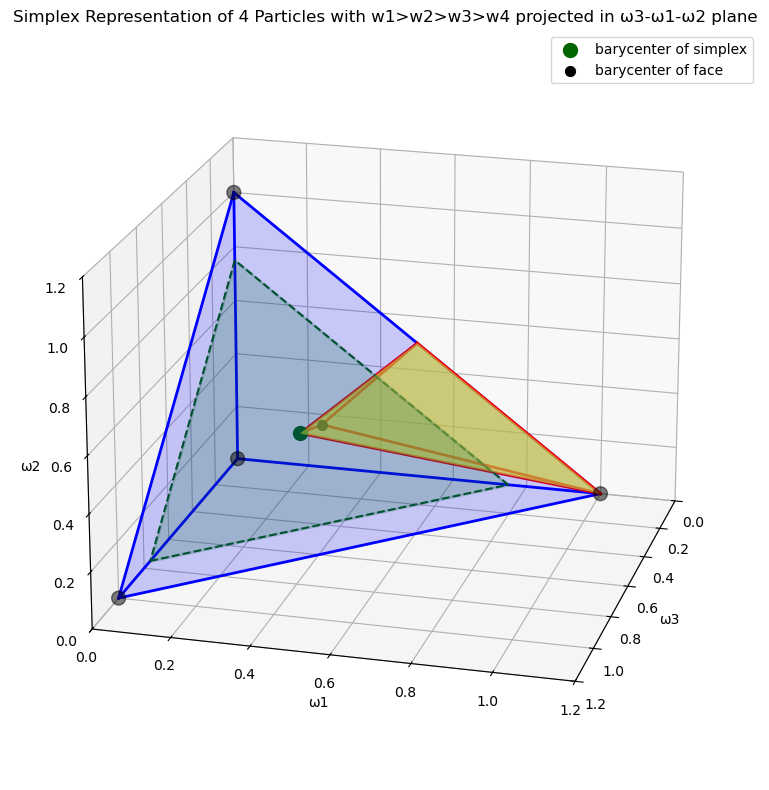

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Create figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define vertices for the first tetrahedron (blue)
blue_vertices = np.array([
    [0, 0, 0],  # vertex 0
    [1, 0, 0],  # vertex 1
    [0, 1, 0],  # vertex 2
    [0, 0, 1]   # vertex 3
])

# Define vertices for the second tetrahedron (yellow)
yellow_vertices = np.array([
    [1/3, 1/3, 1/3],  # vertex 0
    [1/4, 1/4, 1/4],  # vertex 1
    [0, 1/2, 1/2],    # vertex 2
    [0, 1, 0]         # vertex 3
])

another_vertices = np.array([
    [3/4, 0, 0],  # vertex 1
    [0, 3/4, 0],  # vertex 2
    [0, 0, 3/4]   # vertex 3
])

# Define the faces of a tetrahedron (using vertex indices)
tetrahedron_faces = [
    [0, 1, 2],  # face 1
    [0, 1, 3],  # face 2
    [0, 2, 3],  # face 3
    [1, 2, 3]   # face 4
]

# Define the edges of a tetrahedron (using vertex indices)
tetrahedron_edges = [
    [0, 1], [0, 2], [0, 3],
    [1, 2], [1, 3], [2, 3]
]

# Function to draw tetrahedron
def draw_tetrahedron(vertices, face_color, face_alpha, edge_color, vertex_color=None, linestyle='-'):
    # Draw faces
    faces = []
    for face in tetrahedron_faces:
        face_vertices = vertices[face]
        faces.append(face_vertices)
    
    # Create 3D polygon collection for faces
    poly3d = Poly3DCollection(faces, alpha=face_alpha, facecolor=face_color, 
                             edgecolor='none')
    ax.add_collection3d(poly3d)
    
    # Draw edges
    for edge in tetrahedron_edges:
        start, end = edge
        x_vals = [vertices[start][0], vertices[end][0]]
        y_vals = [vertices[start][1], vertices[end][1]]
        z_vals = [vertices[start][2], vertices[end][2]]
        ax.plot(x_vals, y_vals, z_vals, color=edge_color, linewidth=2, linestyle=linestyle)
    
    # Draw vertices
    if vertex_color is not None:
        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], 
              color=vertex_color, s=100, alpha=0.5)

# Draw the blue tetrahedron
draw_tetrahedron(blue_vertices, 'blue', 0.1, 'blue', 'black')

# Draw the yellow tetrahedron with dashed edges
draw_tetrahedron(yellow_vertices, 'yellow', 0.4, 'red', None)

ax.scatter(1/4,1/4,1/4, color='darkgreen', label='barycenter of simplex', s=100)
ax.scatter(1/3, 1/3, 1/3, color='black', label='barycenter of face', s=50)

plane_vertices = np.array([
    [3/4, 0, 0],    # vertex on x-axis
    [0, 3/4, 0],    # vertex on y-axis
    [0, 0, 3/4]     # vertex on z-axis
])

# Create the triangular face
plane_face = [plane_vertices]
plane_poly3d = Poly3DCollection(plane_face, alpha=0.2, facecolor='green', 
                               edgecolor='darkgreen', linewidth=2)
ax.add_collection3d(plane_poly3d)

# Draw the edges of the triangular plane
plane_edges = [[0, 1], [1, 2], [2, 0]]
for edge in plane_edges:
    start, end = edge
    x_vals = [plane_vertices[start][0], plane_vertices[end][0]]
    y_vals = [plane_vertices[start][1], plane_vertices[end][1]]
    z_vals = [plane_vertices[start][2], plane_vertices[end][2]]
    ax.plot(x_vals, y_vals, z_vals, color='darkgreen', linestyle='--')



# Set labels and title
ax.set_xlabel('ω3')
ax.set_ylabel('ω1')
ax.set_zlabel('ω2')
ax.set_title('Simplex Representation of 4 Particles with w1>w2>w3>w4 projected in ω3-ω1-ω2 plane')

# Set equal aspect ratio
max_range = 1.2
ax.set_xlim([0, max_range])
ax.set_ylim([0, max_range])
ax.set_zlim([0, max_range])
ax.view_init(elev=20, azim=15)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

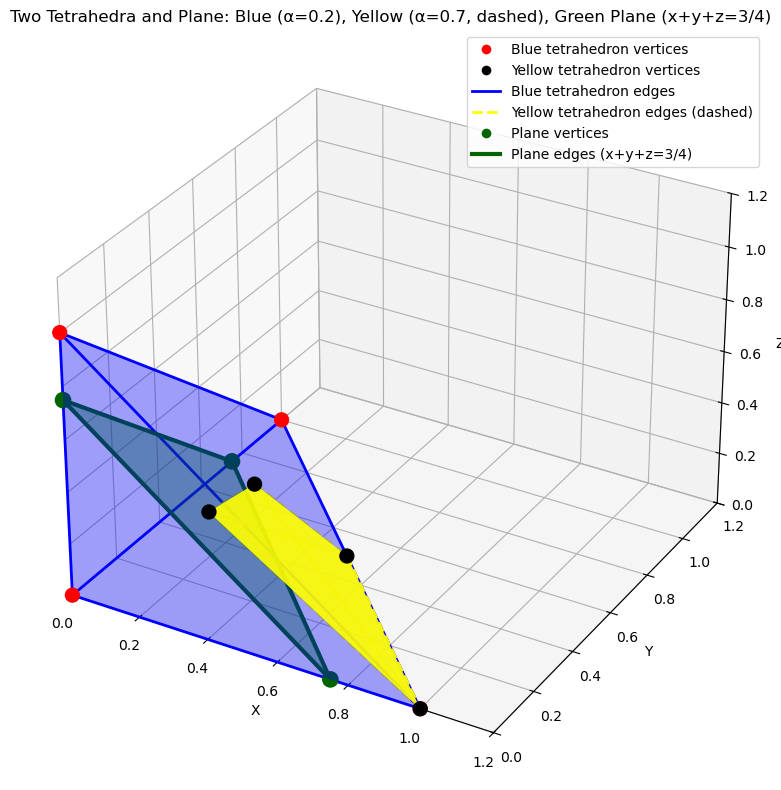

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Create figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define vertices for the first tetrahedron (blue)
blue_vertices = np.array([
    [0, 0, 0],  # vertex 0
    [1, 0, 0],  # vertex 1
    [0, 1, 0],  # vertex 2
    [0, 0, 1]   # vertex 3
])

# Define vertices for the second tetrahedron (yellow)
yellow_vertices = np.array([
    [1/3, 1/3, 1/3],  # vertex 0
    [1/4, 1/4, 1/4],  # vertex 1
    [1/2, 1/2, 0],    # vertex 2
    [1, 0, 0]         # vertex 3
])

# Define the faces of a tetrahedron (using vertex indices)
tetrahedron_faces = [
    [0, 1, 2],  # face 1
    [0, 1, 3],  # face 2
    [0, 2, 3],  # face 3
    [1, 2, 3]   # face 4
]

# Define the edges of a tetrahedron (using vertex indices)
tetrahedron_edges = [
    [0, 1], [0, 2], [0, 3],
    [1, 2], [1, 3], [2, 3]
]

# Function to draw tetrahedron
def draw_tetrahedron(vertices, face_color, face_alpha, edge_color, vertex_color, linestyle='-'):
    # Draw faces
    faces = []
    for face in tetrahedron_faces:
        face_vertices = vertices[face]
        faces.append(face_vertices)
    
    # Create 3D polygon collection for faces
    poly3d = Poly3DCollection(faces, alpha=face_alpha, facecolor=face_color, 
                             edgecolor='none')
    ax.add_collection3d(poly3d)
    
    # Draw edges
    for edge in tetrahedron_edges:
        start, end = edge
        x_vals = [vertices[start][0], vertices[end][0]]
        y_vals = [vertices[start][1], vertices[end][1]]
        z_vals = [vertices[start][2], vertices[end][2]]
        ax.plot(x_vals, y_vals, z_vals, color=edge_color, linewidth=2, linestyle=linestyle)
    
    # Draw vertices
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], 
              color=vertex_color, s=100, alpha=1.0)

# Draw the blue tetrahedron
draw_tetrahedron(blue_vertices, 'blue', 0.2, 'blue', 'red')

# Draw the yellow tetrahedron with dashed edges
draw_tetrahedron(yellow_vertices, 'yellow', 0.7, 'yellow', 'black', '--')

# Add triangular plane: x + y + z = 3/4
# Define vertices of the triangular plane


# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Two Tetrahedra and Plane: Blue (α=0.2), Yellow (α=0.7, dashed), Green Plane (x+y+z=3/4)')

# Set equal aspect ratio
max_range = 1.2
ax.set_xlim([0, max_range])
ax.set_ylim([0, max_range])
ax.set_zlim([0, max_range])

# Add a legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Blue tetrahedron vertices'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='Yellow tetrahedron vertices'),
    Line2D([0], [0], color='blue', linewidth=2, label='Blue tetrahedron edges'),
    Line2D([0], [0], color='yellow', linewidth=2, linestyle='--', label='Yellow tetrahedron edges (dashed)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='darkgreen', markersize=8, label='Plane vertices'),
    Line2D([0], [0], color='darkgreen', linewidth=3, label='Plane edges (x+y+z=3/4)')
]
ax.legend(handles=legend_elements, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

Generating 4D sphere boundaries...


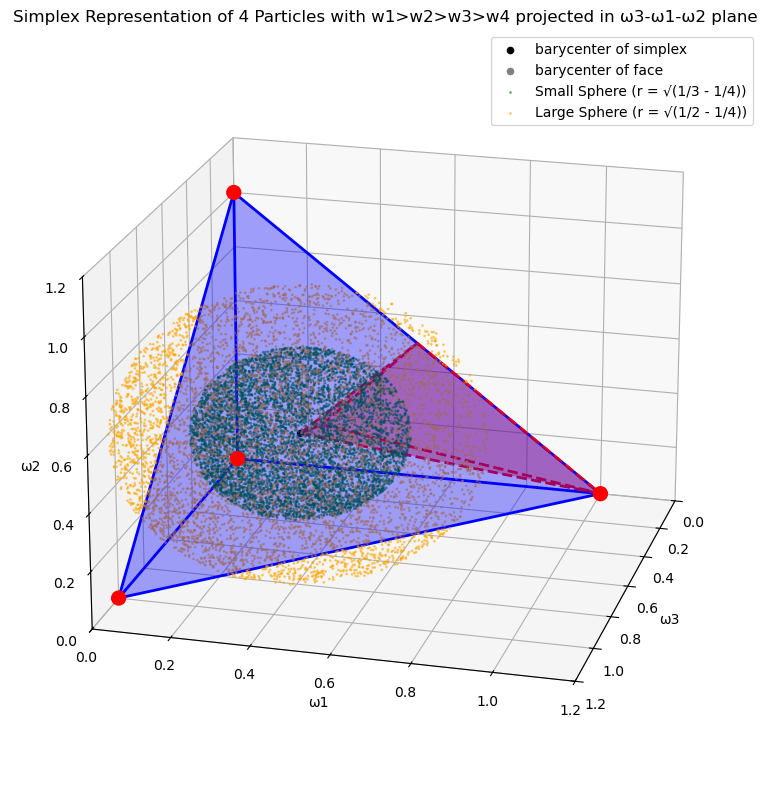

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def generate_nd_sphere_surface(dim=4,n_points=80000):
    center = 1/dim * np.ones(dim)  # Center of the sphere at (1/dim, 1/dim, ..., 1/dim)
    radius_small = np.sqrt(1/3 - 1/dim)
    radius_large = np.sqrt(1/2 - 1/dim)
    points = np.random.normal(0, 1, (dim, n_points))
    
    # Normalize to unit 3-sphere surface (all points have norm = 1)
    norms = np.linalg.norm(points, axis=0)
    points = points / norms
    
    # Scale by radius and translate by center
    points_small = radius_small * points + center.reshape(-1, 1)
    points_large = radius_large * points + center.reshape(-1, 1)
    
    return points_small, points_large

# Generate 4D sphere surface points
print("Generating 4D sphere boundaries...")
points_nd_small, points_nd_large = generate_nd_sphere_surface(4, 8000)

# Project to 3D by dropping the 4th dimension
points_3d_small = points_nd_small[:3, :]  # Take first 3 dimensions
points_3d_large = points_nd_large[:3, :]

index_small = np.where((np.sum(points_3d_small, axis=0) < 1))[0]
index_large = np.where((np.sum(points_3d_large, axis=0) < 1))[0]

points_3d_large = points_3d_large[:, index_large]
points_3d_small = points_3d_small[:, index_small]


# Create figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define vertices for the first tetrahedron (blue)
blue_vertices = np.array([
    [0, 0, 0],  # vertex 0
    [1, 0, 0],  # vertex 1
    [0, 1, 0],  # vertex 2
    [0, 0, 1]   # vertex 3
])

# Define vertices for the second tetrahedron (yellow)
yellow_vertices = np.array([
    [1/3, 1/3, 1/3],  # vertex 0
    [1/4, 1/4, 1/4],  # vertex 1
    [0, 1/2, 1/2],    # vertex 2
    [0, 1, 0]         # vertex 3
])

# Define the faces of a tetrahedron (using vertex indices)
tetrahedron_faces = [
    [0, 1, 2],  # face 1
    [0, 1, 3],  # face 2
    [0, 2, 3],  # face 3
    [1, 2, 3]   # face 4
]

# Define the edges of a tetrahedron (using vertex indices)
tetrahedron_edges = [
    [0, 1], [0, 2], [0, 3],
    [1, 2], [1, 3], [2, 3]
]

# Function to draw tetrahedron
def draw_tetrahedron(vertices, face_color, face_alpha, edge_color, vertex_color=None, linestyle='-'):
    # Draw faces
    faces = []
    for face in tetrahedron_faces:
        face_vertices = vertices[face]
        faces.append(face_vertices)
    
    # Create 3D polygon collection for faces
    poly3d = Poly3DCollection(faces, alpha=face_alpha, facecolor=face_color, 
                             edgecolor='none')
    ax.add_collection3d(poly3d)
    
    # Draw edges
    for edge in tetrahedron_edges:
        start, end = edge
        x_vals = [vertices[start][0], vertices[end][0]]
        y_vals = [vertices[start][1], vertices[end][1]]
        z_vals = [vertices[start][2], vertices[end][2]]
        ax.plot(x_vals, y_vals, z_vals, color=edge_color, linewidth=2, linestyle=linestyle)
    
    # Draw vertices
    if vertex_color is not None:
        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], 
              color=vertex_color, s=100, alpha=1.0)

# Draw the blue tetrahedron
draw_tetrahedron(blue_vertices, 'blue', 0.2, 'blue', 'red')

# Draw the yellow tetrahedron with dashed edges
draw_tetrahedron(yellow_vertices, 'red', 0.2, 'red', None, '--')

ax.scatter(1/4,1/4,1/4, color='black', label='barycenter of simplex')
ax.scatter(1/3, 1/3, 1/3, color='gray', label='barycenter of face')

# draw the small and large spheres
ax.scatter(points_3d_small[0, :], points_3d_small[1, :], points_3d_small[2, :], 
           color='green', s=1, alpha=0.5, label='Small Sphere (r = √(1/3 - 1/4))')
ax.scatter(points_3d_large[0, :], points_3d_large[1, :], points_3d_large[2, :],
           color='orange', s=1, alpha=0.5, label='Large Sphere (r = √(1/2 - 1/4))')


# Set labels and title
ax.set_xlabel('ω3')
ax.set_ylabel('ω1')
ax.set_zlabel('ω2')
ax.set_title('Simplex Representation of 4 Particles with w1>w2>w3>w4 projected in ω3-ω1-ω2 plane')

# Set equal aspect ratio
max_range = 1.2
ax.set_xlim([0, max_range])
ax.set_ylim([0, max_range])
ax.set_zlim([0, max_range])
ax.view_init(elev=20, azim=15)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
# generate a N dim ball center at (1/N, 1/N, ..., 1/N) with radius r = sqrt(1/i - 1/N)

import numpy as np
def generate_nd_ball_surface(i, dim=4, n_points=80000):
    center = 1/dim * np.ones(dim)  # Center of the sphere at (1/dim, 1/dim, ..., 1/dim)
    radius = np.sqrt(1/i - 1/dim)  # Radius based on the formula provided
    points = np.random.normal(0, 1, (dim, n_points))

    norms = np.linalg.norm(points, axis=0)
    points = points / norms
    
    # Scale by radius and translate by center
    points = radius * points + center.reshape(-1, 1)
    # for each point make sure w1 > w2 > ... > wn
    points = points.T
    points = np.sort(points, axis=1)
    points = points.T
    return points

In [ ]:
for i in range(1, 1000):
    points = generate_nd_ball_surface(i, dim=1000, n_points=1000)
    # check if the sum of the points is close to 1
    if np.allclose(np.sum(points, axis=0), 1, atol=1e-3):
        print(f"Found a point with i={i}: {points[:, 0]}")
        break

simulate weff

In [60]:
# generate num x dim points with positive coordinates and sum to 1
num = 500000
dim = 100
index_all = []
a = np.random.rand(num, dim)
a = a/np.sum(a, axis=1, keepdims=True)  # Normalize each row to sum to 1

for i in range(1,dim):
    index = np.where((np.linalg.norm(a, axis=1) < np.sqrt(1/i - 1/dim)) & (np.linalg.norm(a, axis=1) > np.sqrt(1/(i+1) - 1/dim)))[0]
    point = a[index, :]
    if len(point) > 0:
        point = np.sum(np.sort(point, axis=1)[:,-i:], axis=1)
        index_all.append((i,np.min(point)))
    else:
        index_all.append((i, 0))


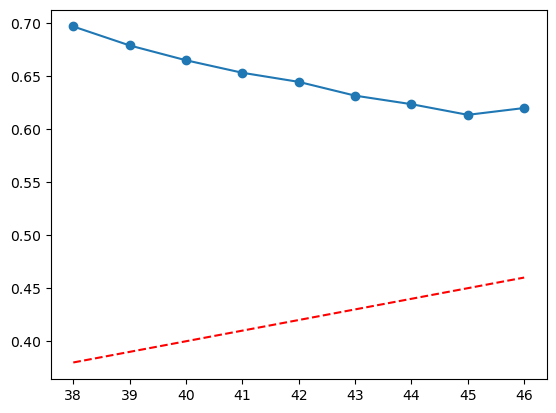

In [61]:
x, y = [], []

for i, val in index_all:
    if val > 0:
        x.append(i)
        y.append(val)
        
plt.plot(x, y, marker='o')

z = np.linspace(np.min(x), np.max(x), 1000)
plt.plot(z, z/dim, color='red', linestyle='--', label='y = x/dim')

In [36]:
# sort the point so that w1 > w2 > ... > wn
a_sorted = np.sort(a, axis=1)  # Sort each row
# Transpose to get the points in the desired order

# Print the sorted points
print("Sorted points (w1 > w2 > ... > wn):")
print(a_sorted)

Sorted points (w1 > w2 > ... > wn):
[[0.11727802 0.1398151  0.24139479 0.50151209]
 [0.11465492 0.26416763 0.29599322 0.32518423]
 [0.19627037 0.22692734 0.23192375 0.34487855]
 [0.07048122 0.08548955 0.25948098 0.58454825]
 [0.1929289  0.19958678 0.28945219 0.31803213]]


In [32]:
a

array([[0.1353043 , 0.13223524, 0.02492473, 0.10340565],
       [0.15314503, 0.25476611, 0.05546692, 0.21846384],
       [0.2719335 , 0.27605686, 0.13218048, 0.24449122],
       [0.4176319 , 0.39590354, 0.22260024, 0.25070015],
       [0.48055456, 0.56473757, 0.34672721, 0.31877095]])

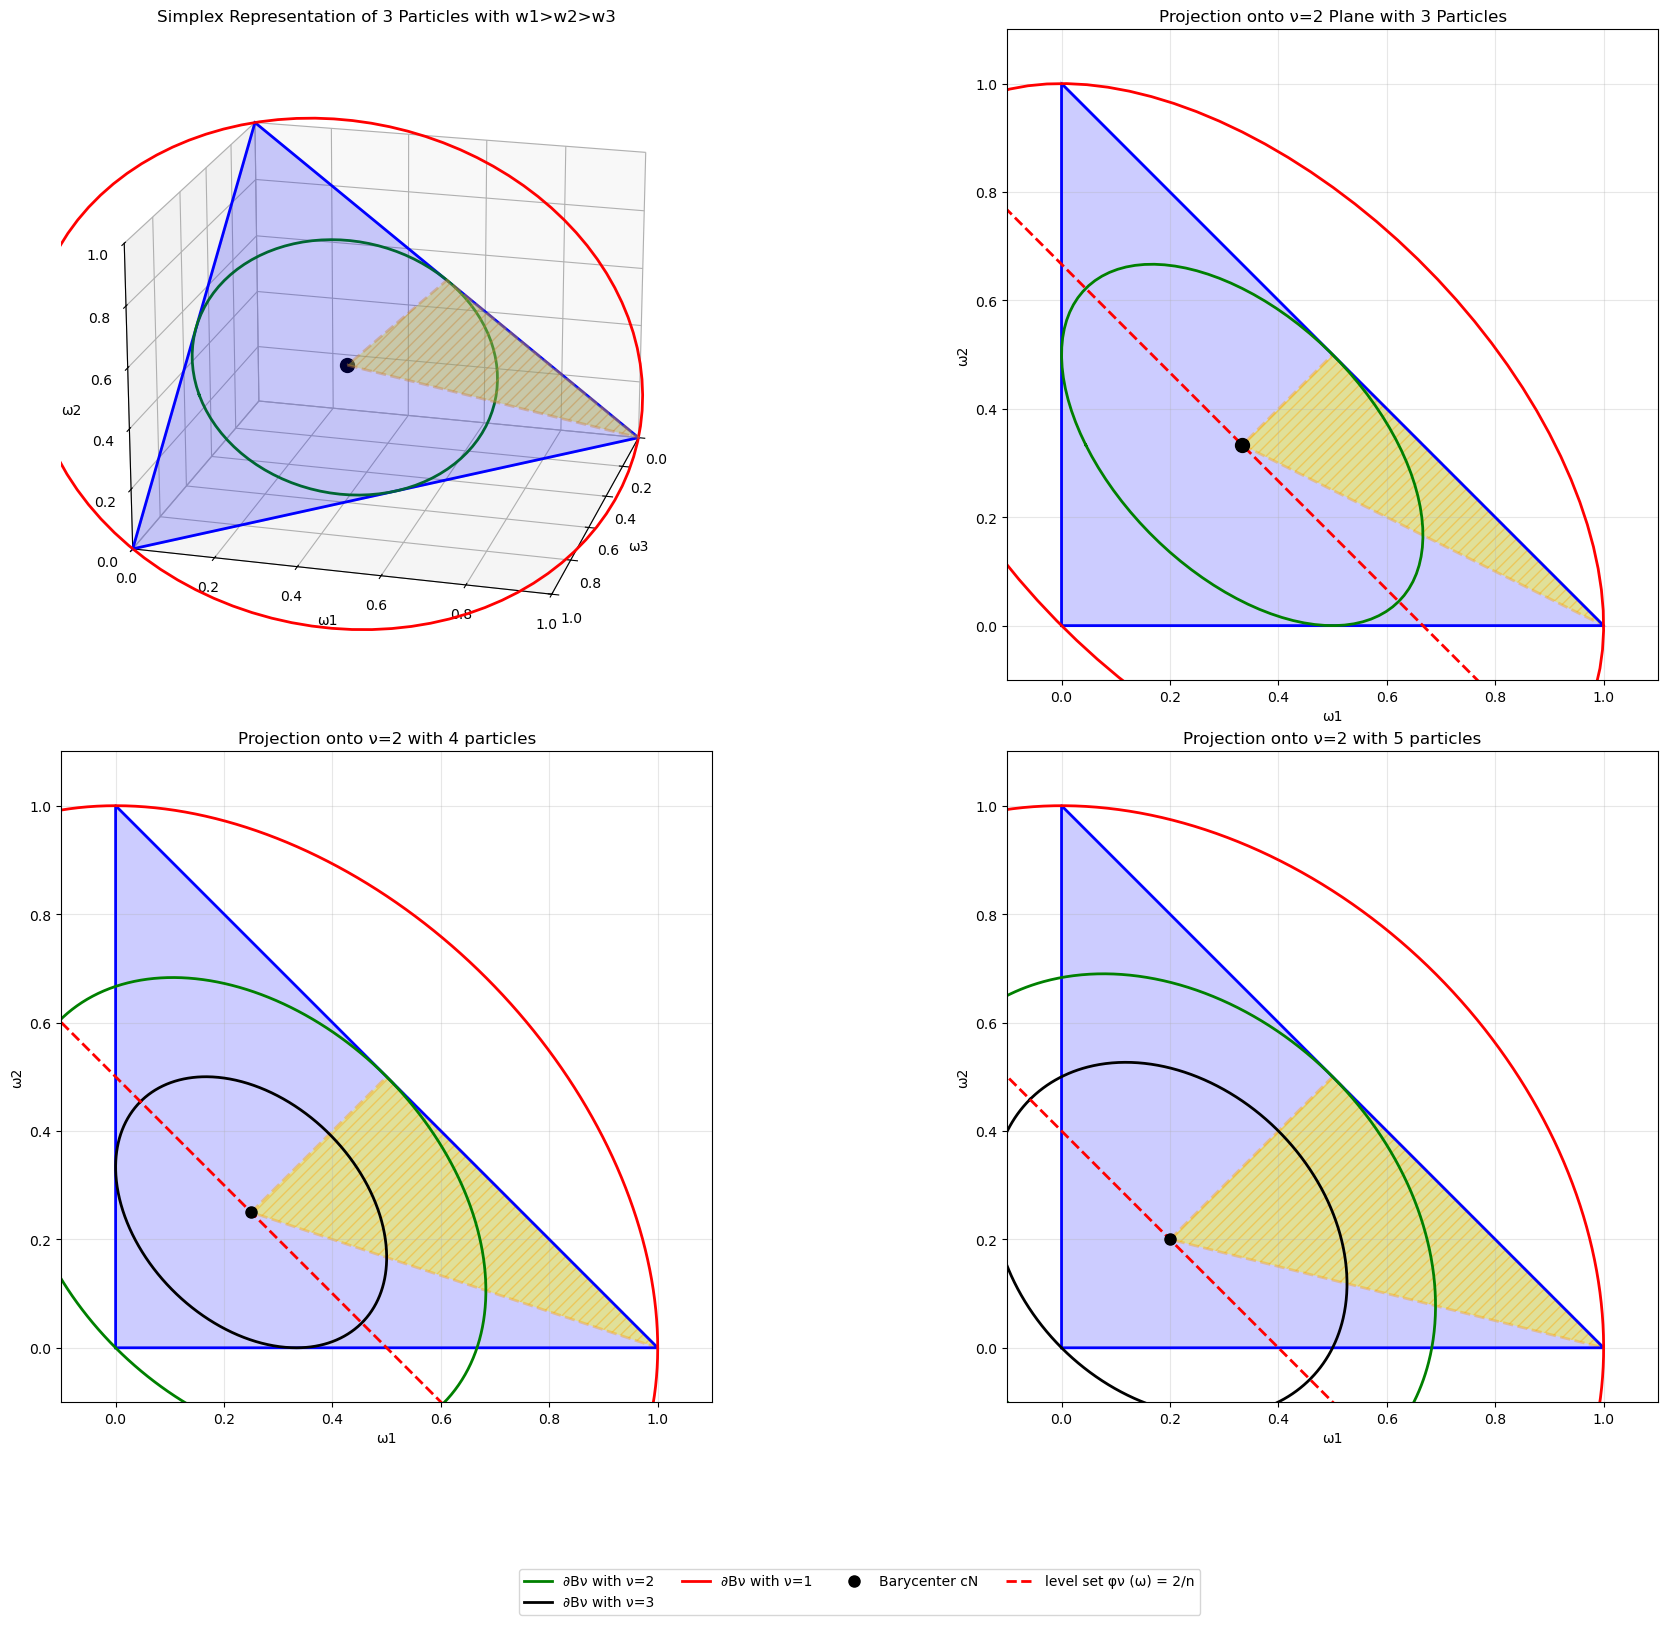

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def draw_half_ellipse_and_circle(n, rl, rls):
    """
    Draw a half ellipse and half circle with specified parameters
    
    Parameters:
    n: input parameter that determines the center and radii
    rl: long radius
    rls: short radius for ellipse
    """
    center_x = 1/n
    center_y = 1/n
    angle = 3*np.pi/4
    
    # Rotation matrices
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    
    # Generate test points
    t_test = np.linspace(0, 2*np.pi, 1000)
    
    # Test ellipse points
    x_ellipse = center_x + (rl * np.cos(t_test) * cos_angle - rls * np.sin(t_test) * sin_angle)
    y_ellipse = center_y + (rl * np.cos(t_test) * sin_angle + rls * np.sin(t_test) * cos_angle)
    
    return x_ellipse, y_ellipse

# Create figure with 2x2 subplots
fig = plt.figure(figsize=(20, 16))

# ====== 3D PLOT (Top Left) ======
ax1 = fig.add_subplot(221, projection='3d')

# Define vertices of the simplex
vertices = np.array([
    [1, 0, 0],  # Point on x-axis
    [0, 1, 0],  # Point on y-axis
    [0, 0, 1]   # Point on z-axis
])

# Create triangular face
triangle = [vertices]
triangle_collection = Poly3DCollection(triangle, alpha=0.2, facecolor='blue', edgecolor='blue')
ax1.add_collection3d(triangle_collection)

# Plot vertices and edges
for i in range(3):
    start = vertices[i]
    end = vertices[(i + 1) % 3]
    ax1.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], 'b-', linewidth=2)

# Add circles centered at barycenter (1/3, 1/3, 1/3)
center = np.array([1/3, 1/3, 1/3])

# Define orthogonal vectors in the simplex plane (x + y + z = 1)
u1 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])
u2 = np.array([1/np.sqrt(6), 1/np.sqrt(6), -2/np.sqrt(6)])

# Create circles
t = np.linspace(0, 2*np.pi, 100)
r1 = 1/np.sqrt(6)
r2 = 2/np.sqrt(6)

circle1 = np.array([center + r1 * (np.cos(ti) * u1 + np.sin(ti) * u2) for ti in t])
circle2 = np.array([center + r2 * (np.cos(ti) * u1 + np.sin(ti) * u2) for ti in t])

ax1.plot(circle1[:, 0], circle1[:, 1], circle1[:, 2], 'g-', linewidth=2, label='B_v with v=2')
ax1.plot(circle2[:, 0], circle2[:, 1], circle2[:, 2], 'r-', linewidth=2, label='B_v with v=1')
ax1.scatter(center[0], center[1], center[2], color='black', s=100, label='Barycenter')

# Add custom triangle (yellow region)
triangle_coords_w1w2w3 = np.array([
    [1/3, 1/3, 1/3],  # Center point
    [1, 0, 0],        # Vertex
    [1/2, 1/2, 0]     # Edge point
])

triangle_coords_3d = triangle_coords_w1w2w3[:, [2, 0, 1]]  # Convert to [ω3, ω1, ω2]
custom_triangle = [triangle_coords_3d]
custom_triangle_collection = Poly3DCollection(custom_triangle, alpha=0.4, 
                                             facecolor='yellow', edgecolor='orange', 
                                             linestyle='--', linewidth=2, hatch='///')
ax1.add_collection3d(custom_triangle_collection)

# Set 3D plot properties
ax1.set_xlabel('ω3')
ax1.set_ylabel('ω1')
ax1.set_zlabel('ω2')
ax1.set_title('Simplex Representation of 3 Particles with w1>w2>w3')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_zlim(0, 1)
ax1.view_init(elev=20, azim=15)

# ====== 2D PROJECTION (Top Right) ======
ax2 = fig.add_subplot(222)

# Project vertices onto ω1-ω2 plane
vertices_w1w2 = vertices[:, [1, 2]]  # Take ω1 (y) and ω2 (z) coordinates

# Draw blue triangle with proper edges
triangle_w1 = [vertices_w1w2[0, 0], vertices_w1w2[1, 0], vertices_w1w2[2, 0], vertices_w1w2[0, 0]]
triangle_w2 = [vertices_w1w2[0, 1], vertices_w1w2[1, 1], vertices_w1w2[2, 1], vertices_w1w2[0, 1]]
ax2.fill(triangle_w1, triangle_w2, alpha=0.2, color='blue', edgecolor='blue', linewidth=2)
ax2.plot(triangle_w1, triangle_w2, color='blue', linewidth=2)  # Explicit blue edges

# Project and plot circles
center_w1w2 = center[[1, 2]]  # ω1, ω2 coordinates
circle1_w1w2 = circle1[:, [1, 2]]
circle2_w1w2 = circle2[:, [1, 2]]

ax2.plot(circle1_w1w2[:, 0], circle1_w1w2[:, 1], 'g-', linewidth=2)
ax2.plot(circle2_w1w2[:, 0], circle2_w1w2[:, 1], 'r-', linewidth=2)
ax2.scatter(center_w1w2[0], center_w1w2[1], color='black', s=100, zorder=5)

# Add red dashed line x + y = 2/3 (extended across entire figure)
x_line = np.linspace(-0.5, 1.5, 100)
y_line = 2/3 - x_line
ax2.plot(x_line, y_line, 'r--', linewidth=2, label='x + y = 2/3')

# Add yellow triangle projection
triangle_coords_projected = triangle_coords_w1w2w3[:, [0, 1]]  # Take ω1, ω2
triangle_proj_w1 = [triangle_coords_projected[0, 0], triangle_coords_projected[1, 0], 
                   triangle_coords_projected[2, 0], triangle_coords_projected[0, 0]]
triangle_proj_w2 = [triangle_coords_projected[0, 1], triangle_coords_projected[1, 1], 
                   triangle_coords_projected[2, 1], triangle_coords_projected[0, 1]]

ax2.fill(triangle_proj_w1, triangle_proj_w2, alpha=0.4, color='yellow', 
         edgecolor='orange', linestyle='--', linewidth=2, hatch='///')

# Set 2D plot properties
ax2.set_xlabel('ω1')
ax2.set_ylabel('ω2')
ax2.set_title('Projection onto ν=2 Plane with 3 Particles')
ax2.set_xlim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

# ====== BOTTOM PLOTS (n=4 and n=5) ======
n_values = [4, 5]

for i, n in enumerate(n_values):
    ax = fig.add_subplot(2, 2, 3 + i)
    
    # Blue triangle with vertices [0,0], [0,1], [1,0]
    triangle_x = [0, 0, 1, 0]
    triangle_y = [0, 1, 0, 0]
    ax.fill(triangle_x, triangle_y, color='blue', alpha=0.2)
    ax.plot(triangle_x, triangle_y, color='blue', linewidth=2)
    
    # Calculate parameters
    rl = np.sqrt(1/2 - 1/n)
    rs = np.sqrt(1/3 - 1/n)
    rls = np.abs(2/n - 1)/np.sqrt(2)
    rss = rs / rl * rls
    rll = np.sqrt(1 - 1/n)
    rlls = rll/rl * rls
    
    center_x = 1/n
    center_y = 1/n
    
    # Draw ellipses/circles
    x_ell1, y_ell1 = draw_half_ellipse_and_circle(n, rl, rls)
    x_ell2, y_ell2 = draw_half_ellipse_and_circle(n, rs, rss)
    x_ell3, y_ell3 = draw_half_ellipse_and_circle(n, rll, rlls)
    
    if len(x_ell1) > 0:
        ax.plot(x_ell1, y_ell1, 'g-', linewidth=2)
    if len(x_ell2) > 0:
        ax.plot(x_ell2, y_ell2, color='black', linewidth=2)
    if len(x_ell3) > 0:
        ax.plot(x_ell3, y_ell3, 'red', linewidth=2)
    
    # Red dashed dividing line (extended across entire figure)
    dividing_line_value = 2/n
    x_line_range = np.linspace(-0.5, 1.5, 100)
    y_line_range = dividing_line_value - x_line_range
    ax.plot(x_line_range, y_line_range, 'r--', linewidth=2)
    
    # Black center point
    ax.plot(center_x, center_y, 'ko', markersize=8)
    
    # Yellow triangle region
    triangle2_x = [1/n, 1/2, 1, 1/n]
    triangle2_y = [1/n, 1/2, 0, 1/n]
    ax.fill(triangle2_x, triangle2_y, color='yellow', alpha=0.4, 
            edgecolor='orange', linestyle='--', linewidth=2, hatch='///')
    
    
    # Set plot properties
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('ω1')
    ax.set_ylabel('ω2')
    ax.set_title(f'Projection onto ν=2 with {n} particles')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

# Add comprehensive legend
legend_elements = [
    plt.Line2D([0], [0], color='g', linewidth=2, label='∂Bν with ν=2'),
    plt.Line2D([0], [0], color='black', linewidth=2, label='∂Bν with ν=3'),
    plt.Line2D([0], [0], color='r', linewidth=2, label='∂Bν with ν=1'),
    plt.Line2D([0], [0], marker='o', color='k', markersize=8, linewidth=0, label='Barycenter cN'),
    plt.Line2D([0], [0], color='r', linestyle='--', linewidth=2, label='level set φν (ω) = 2/n')
]

fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=4)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)  # Make room for the legend
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_21204\559006316.py:6: RuntimeWarning: invalid value encountered in sqrt
  y = x/n + 1/n*np.sqrt((n-1)*(n-x-1)/(x+1)) - (x-1)/n*np.sqrt((n-x-1)/(n-1)/(x+1))


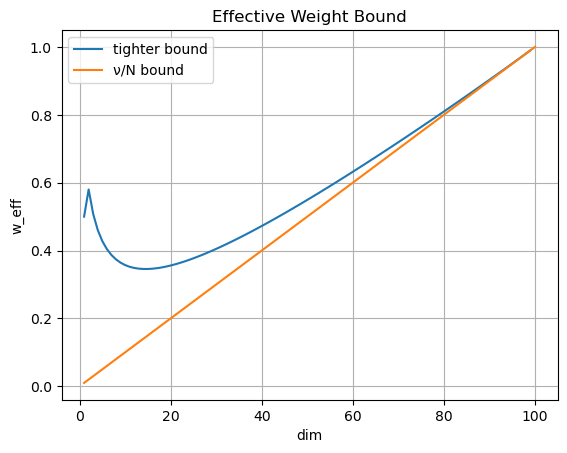

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.linspace(1, n, n)
y = x/n + 1/n*np.sqrt((n-1)*(n-x-1)/(x+1)) - (x-1)/n*np.sqrt((n-x-1)/(n-1)/(x+1))
y[0] = 1/2
z = x/n

plt.plot(x,y, label='tighter bound')
plt.plot(x,z, label='ν/N bound')
plt.xlabel('dim')
plt.ylabel('w_eff')
plt.title('Effective Weight Bound')

#plt.xlim(n/2, n)
plt.grid()
plt.legend()

In [4]:
x

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [3]:
y

array([0.5       , 0.58005892, 0.50759498, 0.46056239, 0.42791516,
       0.40435208, 0.38696716, 0.37401512, 0.36437532, 0.35729039,
       0.35222732, 0.34879842, 0.34671395, 0.34575229, 0.34574063,
       0.34654185, 0.34804557, 0.35016176, 0.35281613, 0.35594674,
       0.35950147, 0.36343609, 0.3677128 , 0.37229902, 0.37716654,
       0.38229077, 0.38765015, 0.39322572, 0.39900066, 0.40496008,
       0.41109064, 0.41738044, 0.42381877, 0.43039595, 0.43710328,
       0.44393282, 0.45087737, 0.45793036, 0.46508581, 0.47233821,
       0.47968251, 0.48711407, 0.49462863, 0.50222222, 0.50989121,
       0.5176322 , 0.52544206, 0.53331787, 0.54125693, 0.54925671,
       0.55731485, 0.56542915, 0.57359757, 0.58181818, 0.59008919,
       0.5984089 , 0.60677575, 0.61518825, 0.62364501, 0.63214473,
       0.64068619, 0.64926824, 0.6578898 , 0.66654986, 0.67524747,
       0.68398175, 0.69275186, 0.70155702, 0.7103965 , 0.71926963,
       0.72817578, 0.73711437, 0.74608485, 0.75508673, 0.76411

Text(0.5, 1.0, 'Effective Weight Bound for Different Dimensions')

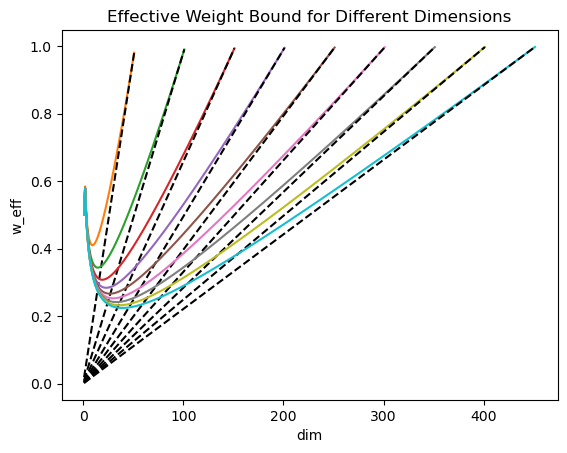

In [6]:
for i in range(2,502,50):
    x = np.linspace(1,i-1, i)
    y = x/i + 1/i*np.sqrt((i-1)*(i-x-1)/(x+1)) - (x-1)/i*np.sqrt((i-x-1)/(i-1)/(x+1))
    y[0] = 1/2
    z = x/i
    p = 1-y
    plt.plot(x,y, label=f'dim={i}')
    plt.plot(x,z, label='ν/N bound', color='black', linestyle='--')
plt.xlabel('dim')
plt.ylabel('w_eff')
plt.title('Effective Weight Bound for Different Dimensions')    

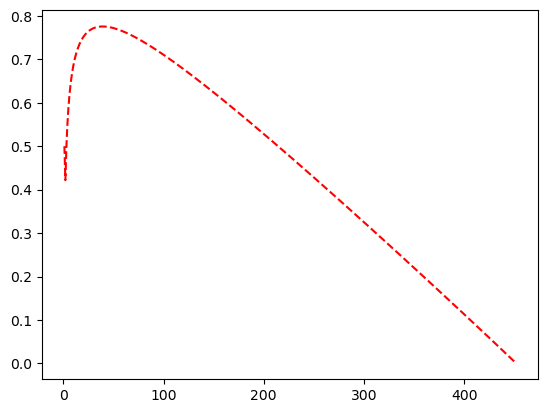

In [7]:
plt.plot(x,p, label='1 - w_eff', color='red', linestyle='--')

# PF Intention Inference

In [3]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def crop_white_borders(image, threshold=240):
    """Crop white borders from an image while keeping content intact"""
    # Convert to numpy array
    img_array = np.array(image.convert('RGB'))
    
    # Find non-white pixels (pixels with any channel below threshold)
    non_white = np.any(img_array < threshold, axis=2)
    
    # Find the bounding box of non-white content
    rows = np.any(non_white, axis=1)
    cols = np.any(non_white, axis=0)
    
    if not np.any(rows) or not np.any(cols):
        return image  # Return original if no content found
    
    row_min, row_max = np.where(rows)[0][[0, -1]]
    col_min, col_max = np.where(cols)[0][[0, -1]]
    
    # Add small padding to avoid cutting too close
    padding = 20
    row_min = max(0, row_min - padding)
    row_max = min(img_array.shape[0], row_max + padding)
    col_min = max(0, col_min - padding)
    col_max = min(img_array.shape[1], col_max + padding)
    
    # Crop the image
    return image.crop((col_min, row_min, col_max, row_max))

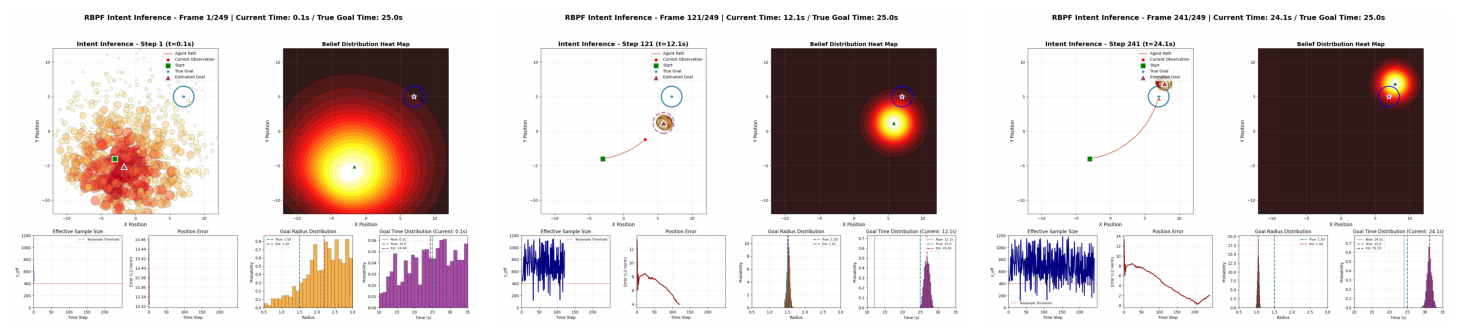

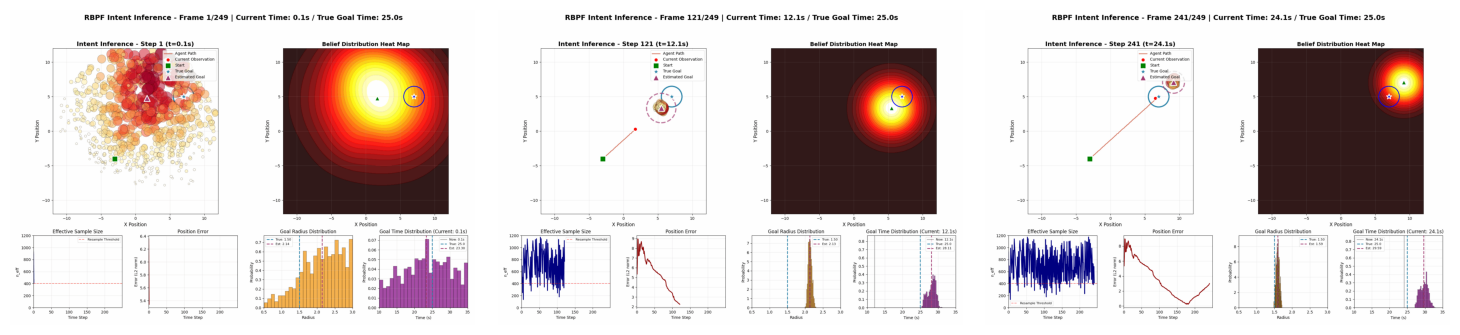

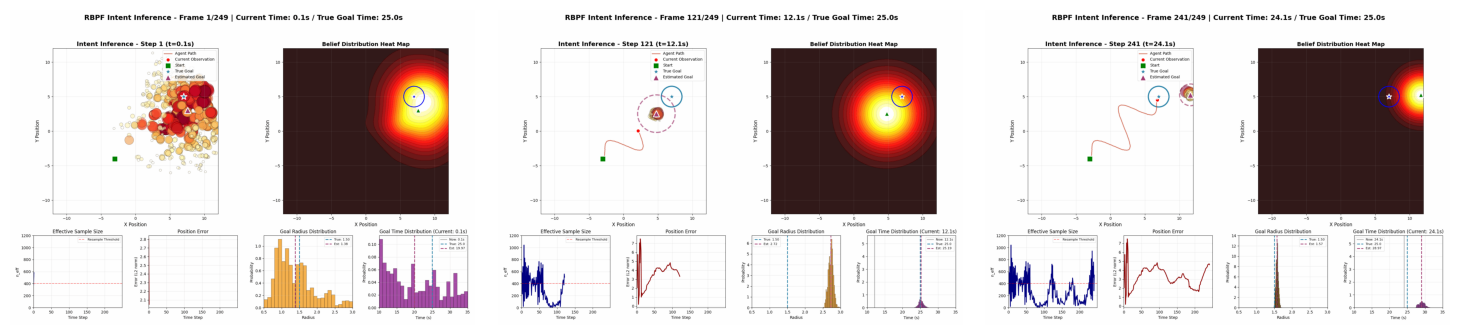

In [4]:
# load gif and export frame 1, 75, 150, 225 as a 2x2 subplot
import imageio
import matplotlib.pyplot as plt

folder_path = "./figures"
name = ["curve", "line", "sinusoid"]

for n in name:
   # Open your GIF file
    gif_path = f'./figures/rbpf_intent_inference_{n}.gif'
    gif = Image.open(gif_path)

    # Frames to extract
    frame_numbers = [1, 121, 241]

    # Extract and crop frames first
    cropped_frames = []
    for frame_num in frame_numbers:
        gif.seek(frame_num)
        frame = gif.convert('RGBA')
        cropped_frame = crop_white_borders(frame)
        cropped_frames.append(cropped_frame)

    # Get dimensions of first cropped frame to maintain aspect ratio
    first_frame = cropped_frames[0]
    aspect_ratio = first_frame.height / first_frame.width

    # Create figure with proper aspect ratio
    fig_width = 15  # Total width for 3 frames
    fig_height = fig_width / 3 * aspect_ratio  # Height based on aspect ratio
    fig, axes = plt.subplots(1, 3, figsize=(fig_width, fig_height))

    # Minimal spacing between subplots
    plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02, wspace=0.05)

    # Plot each cropped frame
    for i, cropped_frame in enumerate(cropped_frames):
        axes[i].imshow(cropped_frame)
        axes[i].axis('off')
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].margins(0)

    # Save with high resolution
    output_filename = f'./figures/{n}_frames.png'
    plt.savefig(output_filename, dpi=400, bbox_inches='tight', pad_inches=0.05)


In [11]:
import os
from PIL import Image
import fitz  # PyMuPDF
from pathlib import Path

def gif_to_pdfs(gif_path, output_folder=None):
    # Get GIF name without extension
    gif_name = Path(gif_path).stem
    
    # Create output folder
    if output_folder is None:
        output_folder = f"{gif_name}_pdfs"
    
    os.makedirs(output_folder, exist_ok=True)
    print(f"Created folder: {output_folder}")
    
    # Open GIF and extract frames
    with Image.open(gif_path) as gif:
        frames = []
        frame_count = 0
        
        try:
            while True:
                # Convert frame to RGB if it's not already
                frame = gif.copy()
                if frame.mode != 'RGB':
                    frame = frame.convert('RGB')
                frames.append(frame)
                frame_count += 1
                gif.seek(gif.tell() + 1)
        except EOFError:
            pass  # End of frames
    
    print(f"Extracted {frame_count} frames from {gif_name}")
    complete_pdf_path = os.path.join(output_folder, f"{gif_name}_complete.pdf")
    frames[0].save(complete_pdf_path, save_all=True, append_images=frames[1:])
    print(f"Saved complete PDF: {complete_pdf_path}")
    
    for i, frame in enumerate(frames):
        frame_pdf_path = os.path.join(output_folder, f"{gif_name}_frame_{i+1}.pdf")
        frame.save(frame_pdf_path, "PDF")
        print(f"Saved frame {i+1} PDF: {frame_pdf_path}")
    
    print(f"\nAll done! Check the '{output_folder}' folder for your PDFs.")

if __name__ == "__main__":
    # Replace with your GIF file path
    for file_name in ["curve", "line", "sinusoid"]:
        gif_file = f"./figures/{file_name}.gif"
        gif_to_pdfs(gif_file, f"{file_name}_sigma_0.22_0.3outside")

Created folder: curve_sigma_0.22_0.3outside
Extracted 249 frames from curve
Saved complete PDF: curve_sigma_0.22_0.3outside\curve_complete.pdf
Saved frame 1 PDF: curve_sigma_0.22_0.3outside\curve_frame_1.pdf
Saved frame 2 PDF: curve_sigma_0.22_0.3outside\curve_frame_2.pdf
Saved frame 3 PDF: curve_sigma_0.22_0.3outside\curve_frame_3.pdf
Saved frame 4 PDF: curve_sigma_0.22_0.3outside\curve_frame_4.pdf
Saved frame 5 PDF: curve_sigma_0.22_0.3outside\curve_frame_5.pdf
Saved frame 6 PDF: curve_sigma_0.22_0.3outside\curve_frame_6.pdf
Saved frame 7 PDF: curve_sigma_0.22_0.3outside\curve_frame_7.pdf
Saved frame 8 PDF: curve_sigma_0.22_0.3outside\curve_frame_8.pdf
Saved frame 9 PDF: curve_sigma_0.22_0.3outside\curve_frame_9.pdf
Saved frame 10 PDF: curve_sigma_0.22_0.3outside\curve_frame_10.pdf
Saved frame 11 PDF: curve_sigma_0.22_0.3outside\curve_frame_11.pdf
Saved frame 12 PDF: curve_sigma_0.22_0.3outside\curve_frame_12.pdf
Saved frame 13 PDF: curve_sigma_0.22_0.3outside\curve_frame_13.pdf
Save

Minimum value of y is 0.3251727321276646 at x = 17.0


Text(0.5, 1.0, 'Minimum value of y is 0.3251727321276646 at x = 17.0')

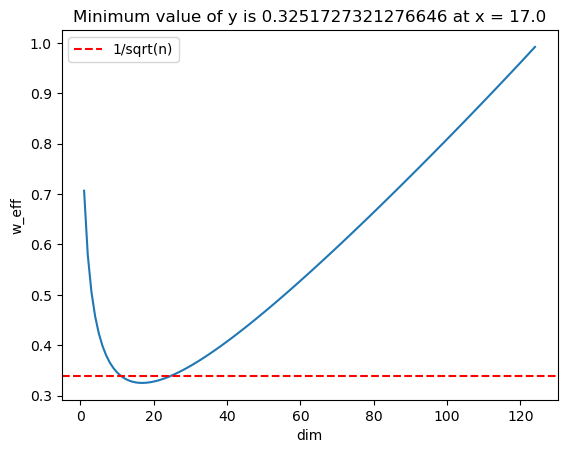

In [32]:
n = 125

x = np.linspace(1, n-1, n-1)
y = x/n + (n-x)/n * np.sqrt((n-x-1)/(x+1)/(n-1))
idx, val = min(enumerate(y), key=lambda p: p[1])
print(f"Minimum value of y is {val} at x = {x[idx]}")
plt.plot(x,y)
z = np.sqrt(n)
plt.axhline(y=z/n + (n-z)/n * np.sqrt((n-z-1)/(z+1)/(n-1)), color='r', linestyle='--', label='1/sqrt(n)')
plt.legend()
plt.xlabel('dim')
plt.ylabel('w_eff')
plt.title(f"Minimum value of y is {val} at x = {x[idx]}")

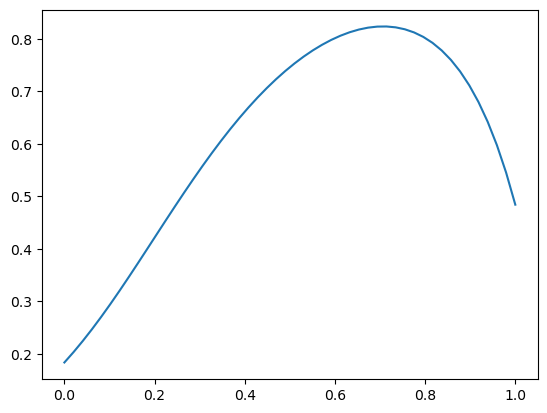

In [4]:
n = 1000
la = 0.5
alpha = np.linspace(0,1)
x = la * (n ** alpha)
y = (n-x)/n * (1 - np.sqrt((n-x-1)/(x+1)/(n-1)))
plt.plot(alpha,y)

C:\Users\PC\AppData\Local\Temp\ipykernel_69096\2752915724.py:5: RuntimeWarning: invalid value encountered in sqrt
  y = (n-x)/n * (1 - np.sqrt((n-x-1)/(x+1)/(n-1)))


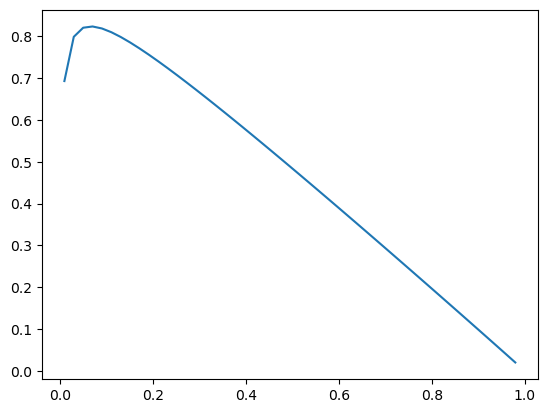

In [9]:
n = 1000
la = np.linspace(0.01,1)
alpha = 1
x = la * (n ** alpha)
y = (n-x)/n * (1 - np.sqrt((n-x-1)/(x+1)/(n-1)))
plt.plot(la,y)

C:\Users\PC\AppData\Local\Temp\ipykernel_69096\3608555772.py:6: RuntimeWarning: invalid value encountered in sqrt
  Y = (n-X)/n * (1 - np.sqrt((n-X-1)/(X+1)/(n-1)))


Text(0.5, 0.92, 'Ineffective Weight (1-w_eff) as function of λ and α')

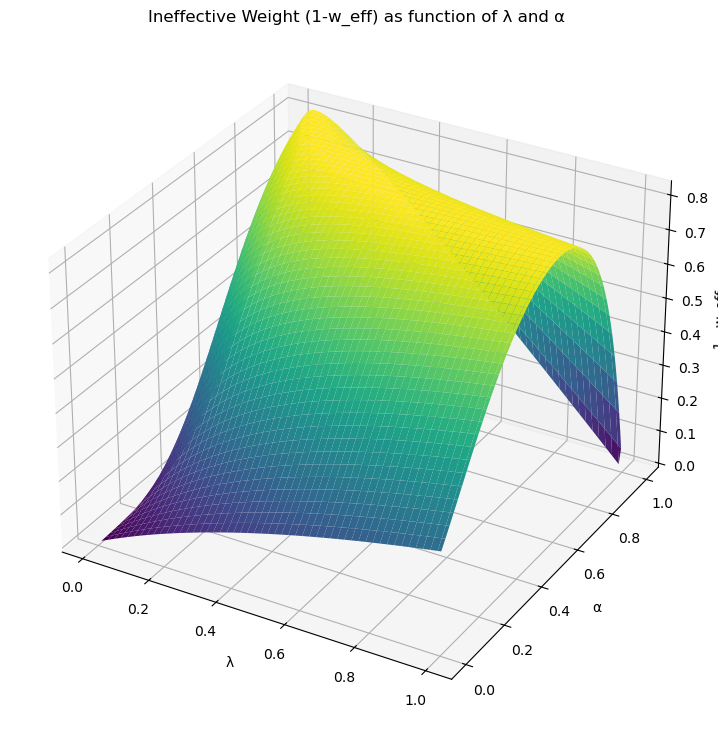

In [16]:
# mesh grid of la and alpha
la = np.linspace(0.01,1,100)
alpha = np.linspace(0,1,100)
LA, ALPHA = np.meshgrid(la, alpha)
X = LA * (n ** ALPHA)
Y = (n-X)/n * (1 - np.sqrt((n-X-1)/(X+1)/(n-1)))
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(LA, ALPHA, Y, cmap='viridis')
ax.set_xlabel('λ')
ax.set_ylabel('α')
ax.set_zlabel('1 - w_eff')
ax.set_title('Ineffective Weight (1-w_eff) as function of λ and α')


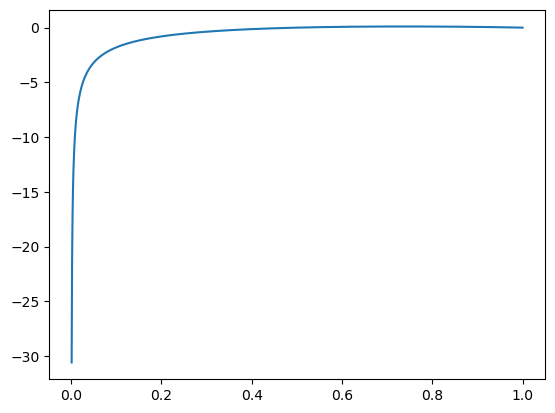

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.001, 1, 1000)
y = (1 - x)*(1 - np.sqrt(((1-x)/x)))
plt.plot(x,y)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from scipy.stats import multivariate_normal
from scipy.special import logsumexp
import matplotlib.animation as animation

from matplotlib.gridspec import GridSpec
import warnings
import os
from PIL import Image
import fitz
from pathlib import Path

warnings.filterwarnings('ignore')

def gif_to_pdfs(gif_path, output_folder=None):
    # Get GIF name without extension
    gif_name = Path(gif_path).stem
    
    # Create output folder
    if output_folder is None:
        output_folder = f"{gif_name}_pdfs"
    
    os.makedirs(output_folder, exist_ok=True)
    print(f"Created folder: {output_folder}")
    
    # Open GIF and extract frames
    with Image.open(gif_path) as gif:
        frames = []
        frame_count = 0
        
        try:
            while True:
                # Convert frame to RGB if it's not already
                frame = gif.copy()
                if frame.mode != 'RGB':
                    frame = frame.convert('RGB')
                frames.append(frame)
                frame_count += 1
                gif.seek(gif.tell() + 1)
        except EOFError:
            pass  # End of frames
    
    print(f"Extracted {frame_count} frames from {gif_name}")
    complete_pdf_path = os.path.join(output_folder, f"{gif_name}_complete.pdf")
    frames[0].save(complete_pdf_path, save_all=True, append_images=frames[1:])
    print(f"Saved complete PDF: {complete_pdf_path}")
'''    
    for i, frame in enumerate(frames):
        frame_pdf_path = os.path.join(output_folder, f"{gif_name}_frame_{i+1}.pdf")
        frame.save(frame_pdf_path, "PDF")
        print(f"Saved frame {i+1} PDF: {frame_pdf_path}")
    
    print(f"\nAll done! Check the '{output_folder}' folder for your PDFs.")'''

if __name__ == "__main__":
    # Replace with your GIF file path
    gif_file = "./figures/line.gif"
    gif_to_pdfs(gif_file, "dynamics_line_dbar_0.2_sigma_0.38_32outside")

Created folder: dynamics_line_dbar_0.2_sigma_0.38_32outside
Extracted 249 frames from line
Saved complete PDF: dynamics_line_dbar_0.2_sigma_0.38_32outside\line_complete.pdf
